In [1]:
# Exploratory Data Analysis of Enriched Shoppers Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

shoppers_data = pd.read_csv('enriched_shoppers_data.csv')

In [3]:
# 1. Basic Descriptive Statistics
print("Dataset Shape:", shoppers_data.shape)
print("\nBasic Information:")
print(shoppers_data.info())

print("\nSummary Statistics of Key Numerical Features:")
numerical_cols = ['Administrative', 'Administrative_Duration', 
                  'Informational', 'Informational_Duration', 
                  'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues',
                  'engagement_depth', 'engagement_score',
                  'browsing_efficiency', 'value_potential']
print(shoppers_data[numerical_cols].describe())

Dataset Shape: (12205, 68)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Administrative                12205 non-null  int64  
 1   Administrative_Duration       12205 non-null  float64
 2   Informational                 12205 non-null  int64  
 3   Informational_Duration        12205 non-null  float64
 4   ProductRelated                12205 non-null  int64  
 5   ProductRelated_Duration       12205 non-null  float64
 6   BounceRates                   12205 non-null  float64
 7   ExitRates                     12205 non-null  float64
 8   PageValues                    12205 non-null  float64
 9   SpecialDay                    12205 non-null  float64
 10  Month                         12205 non-null  object 
 11  OperatingSystems              12205 non-null  int64  
 12  Browser      

In [5]:
# Check the distribution of categorical features
print("\nDistribution of Categorical Features:")
categorical_cols = ['Month', 'VisitorType', 'Weekend', 'behavior_segment', 'interest_category',
                    'bounce_category', 'exit_category']
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(shoppers_data[col].value_counts(normalize=True).round(3) * 100)

# Check conversion rate
conversion_rate = shoppers_data['Revenue'].mean() * 100
print(f"\nOverall Conversion Rate: {conversion_rate:.2f}%")


Distribution of Categorical Features:

Month Distribution:
Month
May     27.3
Nov     24.4
Mar     15.2
Dec     14.0
Oct      4.5
Sep      3.7
Aug      3.5
Jul      3.5
June     2.3
Feb      1.5
Name: proportion, dtype: float64

VisitorType Distribution:
VisitorType
Returning_Visitor    85.5
New_Visitor          13.9
Other                 0.7
Name: proportion, dtype: float64

Weekend Distribution:
Weekend
False    76.6
True     23.4
Name: proportion, dtype: float64

behavior_segment Distribution:
behavior_segment
Cluster_1           79.8
Quick_Bouncers       7.5
Product_Browsers     6.9
High_Converters      5.8
Name: proportion, dtype: float64

interest_category Distribution:
interest_category
Product_Focused      82.9
Balanced_Shopper     13.7
Service_Oriented      3.1
Research_Oriented     0.2
Name: proportion, dtype: float64

bounce_category Distribution:
bounce_category
Low       95.3
Medium     4.7
Name: proportion, dtype: float64

exit_category Distribution:
exit_category
Low   

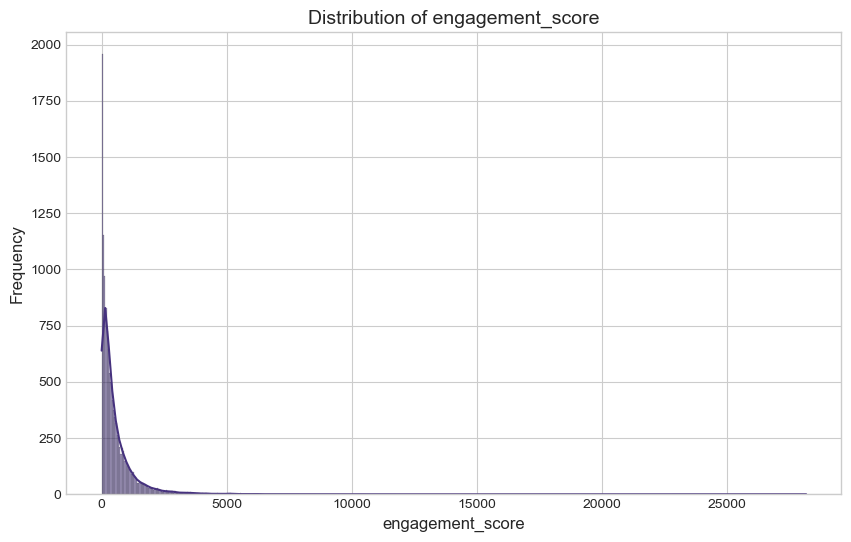

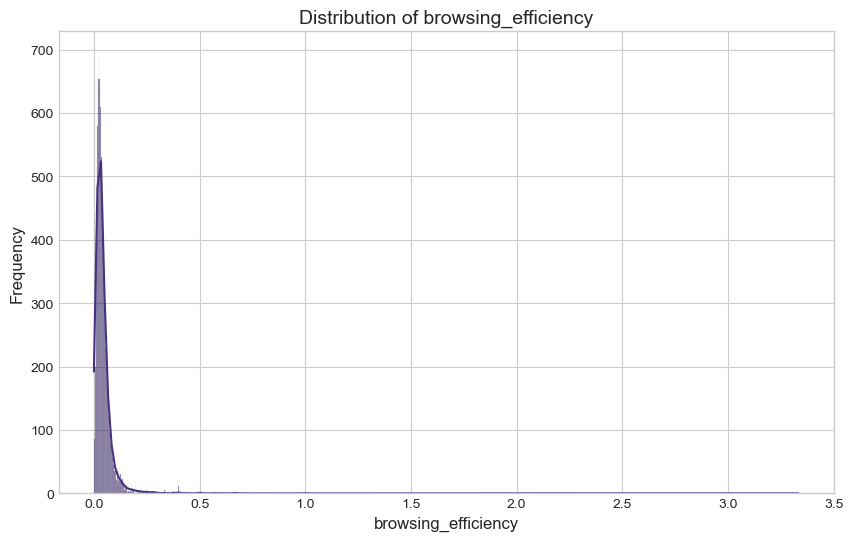

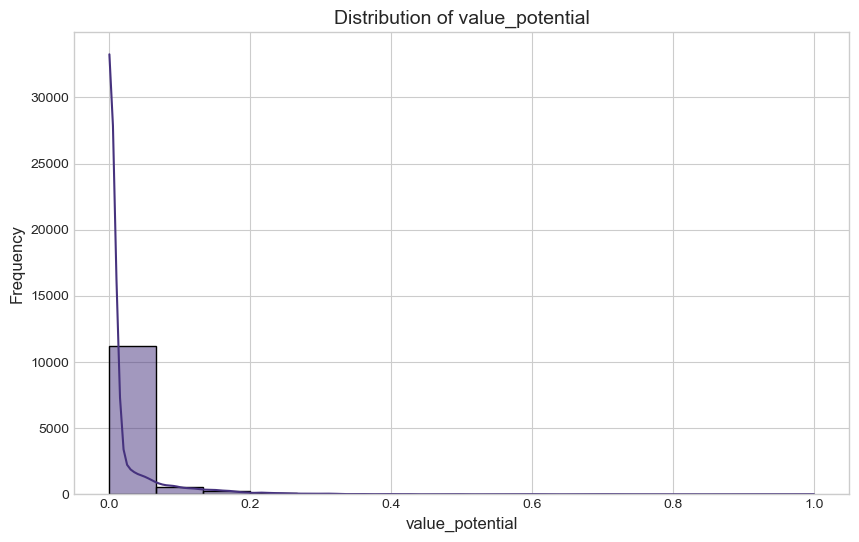

In [ ]:
# 2. Data Distribution Visualizations
# Create distribution plots for key metrics
for col in ['engagement_score', 'browsing_efficiency', 'value_potential']:
    plt.figure(figsize=(10, 6))
    sns.histplot(shoppers_data[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

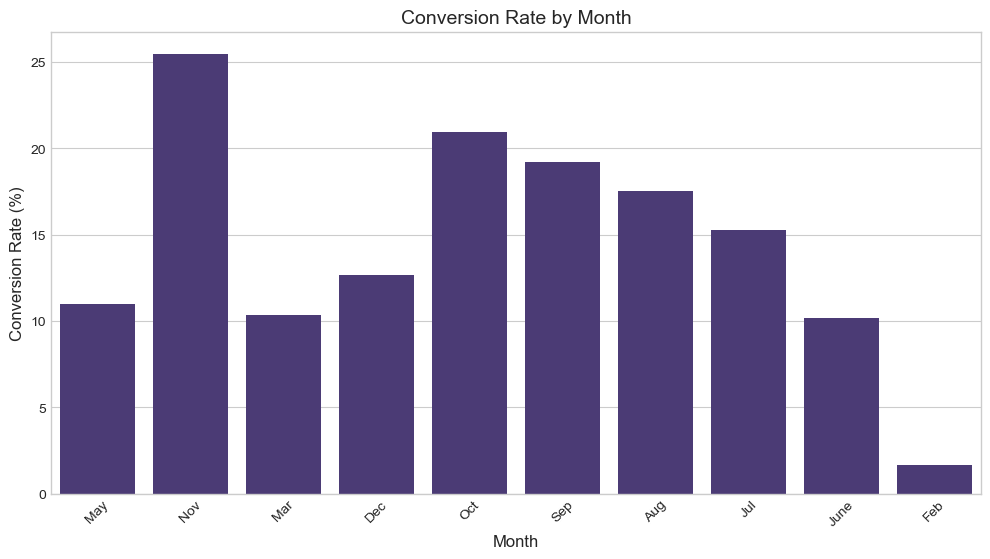

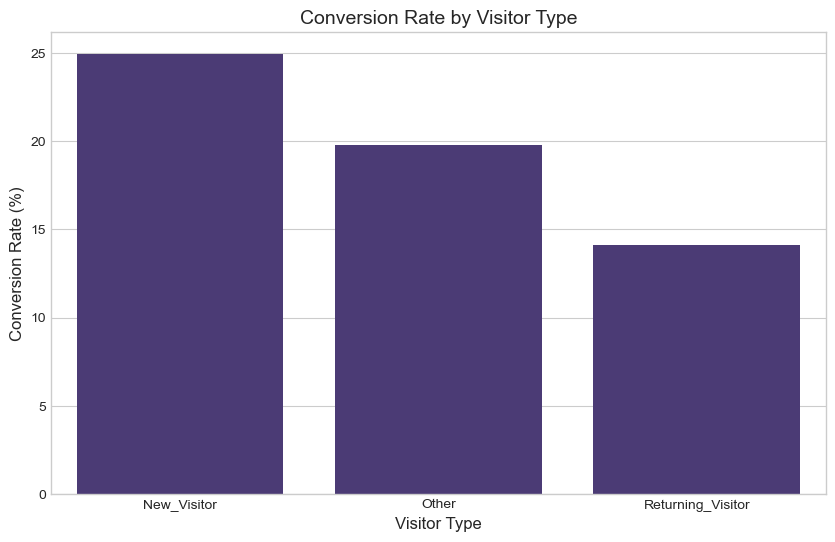

In [7]:
# 3. Conversion Analysis by Key Features
# Conversion rate by Month
plt.figure(figsize=(12, 6))
month_conversion = shoppers_data.groupby('Month')['Revenue'].agg(['count', 'mean'])
month_conversion['conversion_rate'] = month_conversion['mean'] * 100
month_conversion = month_conversion.sort_values('count', ascending=False)

ax = sns.barplot(x=month_conversion.index, y=month_conversion['conversion_rate'])
plt.title('Conversion Rate by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Conversion rate by Visitor Type
plt.figure(figsize=(10, 6))
visitor_conversion = shoppers_data.groupby('VisitorType')['Revenue'].agg(['count', 'mean'])
visitor_conversion['conversion_rate'] = visitor_conversion['mean'] * 100

ax = sns.barplot(x=visitor_conversion.index, y=visitor_conversion['conversion_rate'])
plt.title('Conversion Rate by Visitor Type', fontsize=14)
plt.xlabel('Visitor Type', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.show()


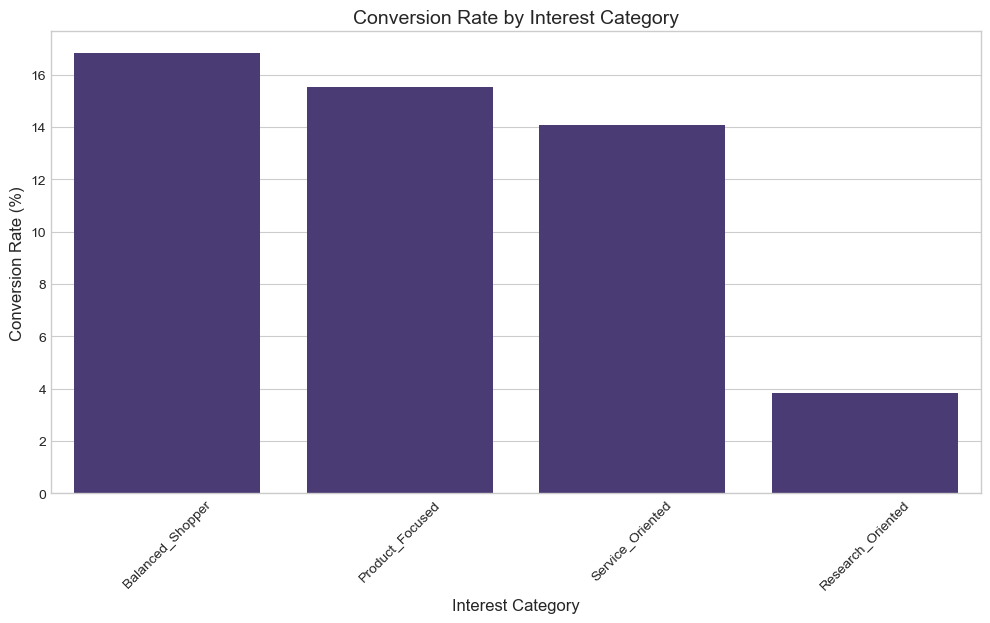

In [8]:
# Conversion rate by Interest Category
plt.figure(figsize=(12, 6))
interest_conversion = shoppers_data.groupby('interest_category')['Revenue'].agg(['count', 'mean'])
interest_conversion['conversion_rate'] = interest_conversion['mean'] * 100
interest_conversion = interest_conversion.sort_values('conversion_rate', ascending=False)

ax = sns.barplot(x=interest_conversion.index, y=interest_conversion['conversion_rate'])
plt.title('Conversion Rate by Interest Category', fontsize=14)
plt.xlabel('Interest Category', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

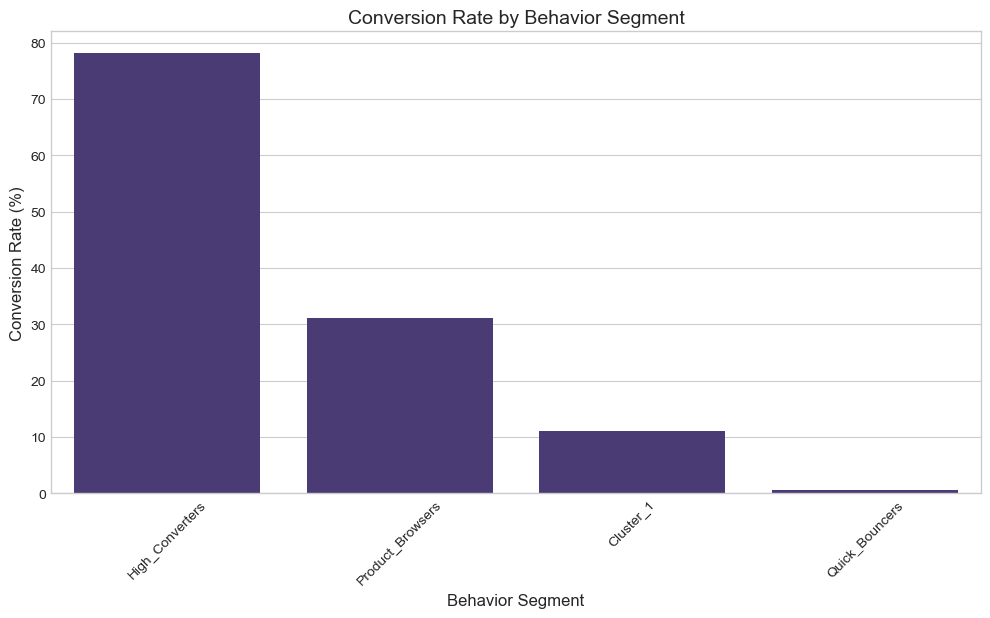

In [9]:
# Conversion rate by Behavior Segment
plt.figure(figsize=(12, 6))
segment_conversion = shoppers_data.groupby('behavior_segment')['Revenue'].agg(['count', 'mean'])
segment_conversion['conversion_rate'] = segment_conversion['mean'] * 100
segment_conversion = segment_conversion.sort_values('conversion_rate', ascending=False)

ax = sns.barplot(x=segment_conversion.index, y=segment_conversion['conversion_rate'])
plt.title('Conversion Rate by Behavior Segment', fontsize=14)
plt.xlabel('Behavior Segment', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

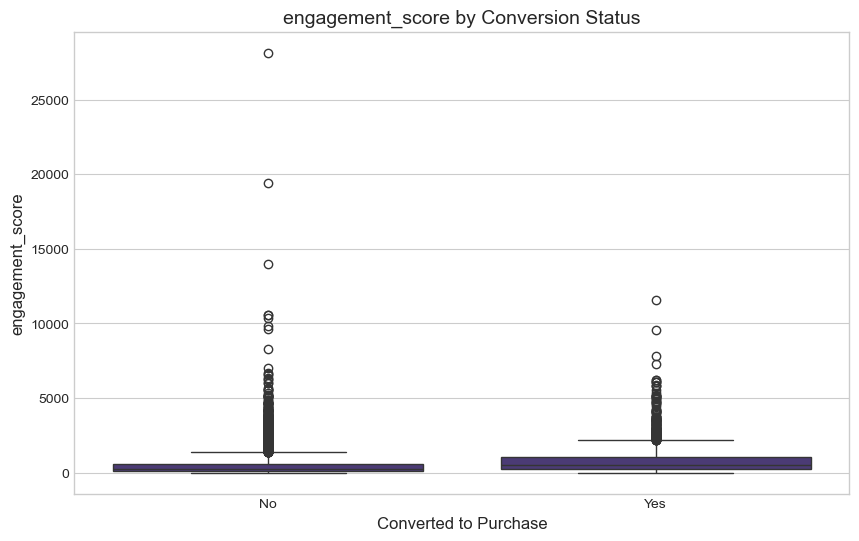

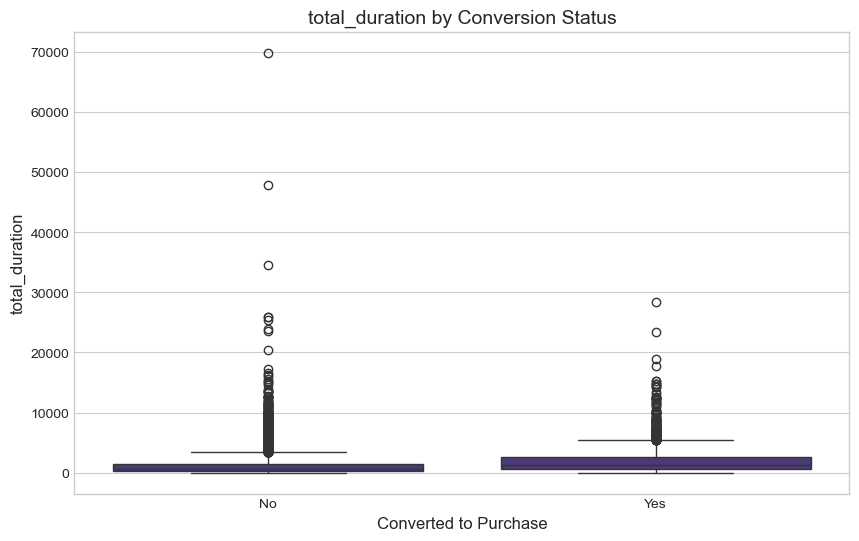

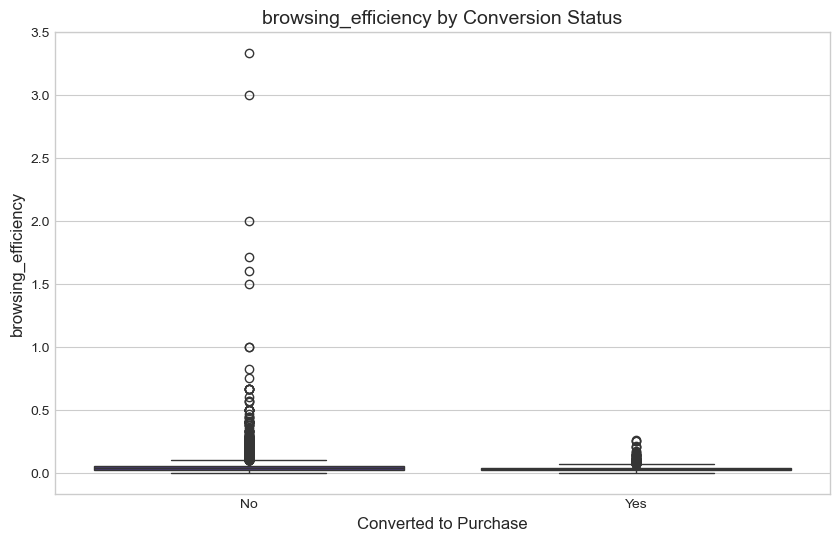

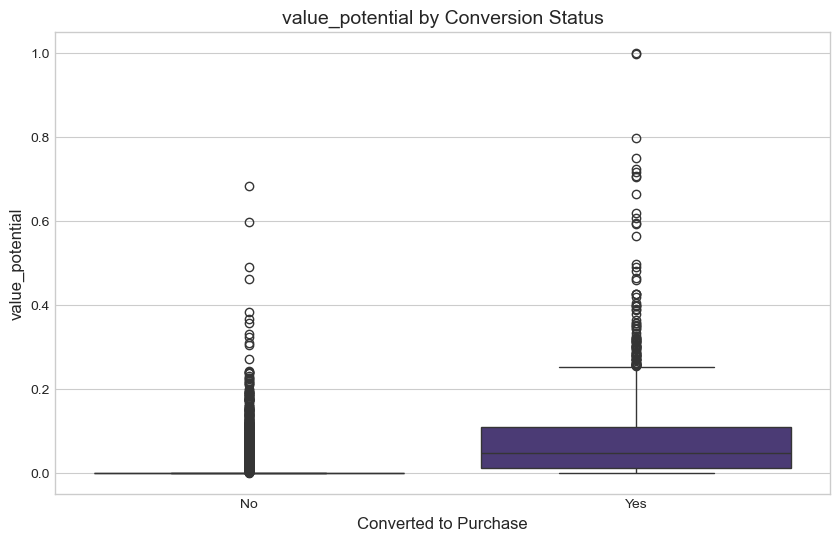

In [10]:
# 4. Relationship Between Engagement Metrics and Conversion
# Boxplots of key metrics by conversion status
for col in ['engagement_score', 'total_duration', 'browsing_efficiency', 'value_potential']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Revenue', y=col, data=shoppers_data)
    plt.title(f'{col} by Conversion Status', fontsize=14)
    plt.xlabel('Converted to Purchase', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

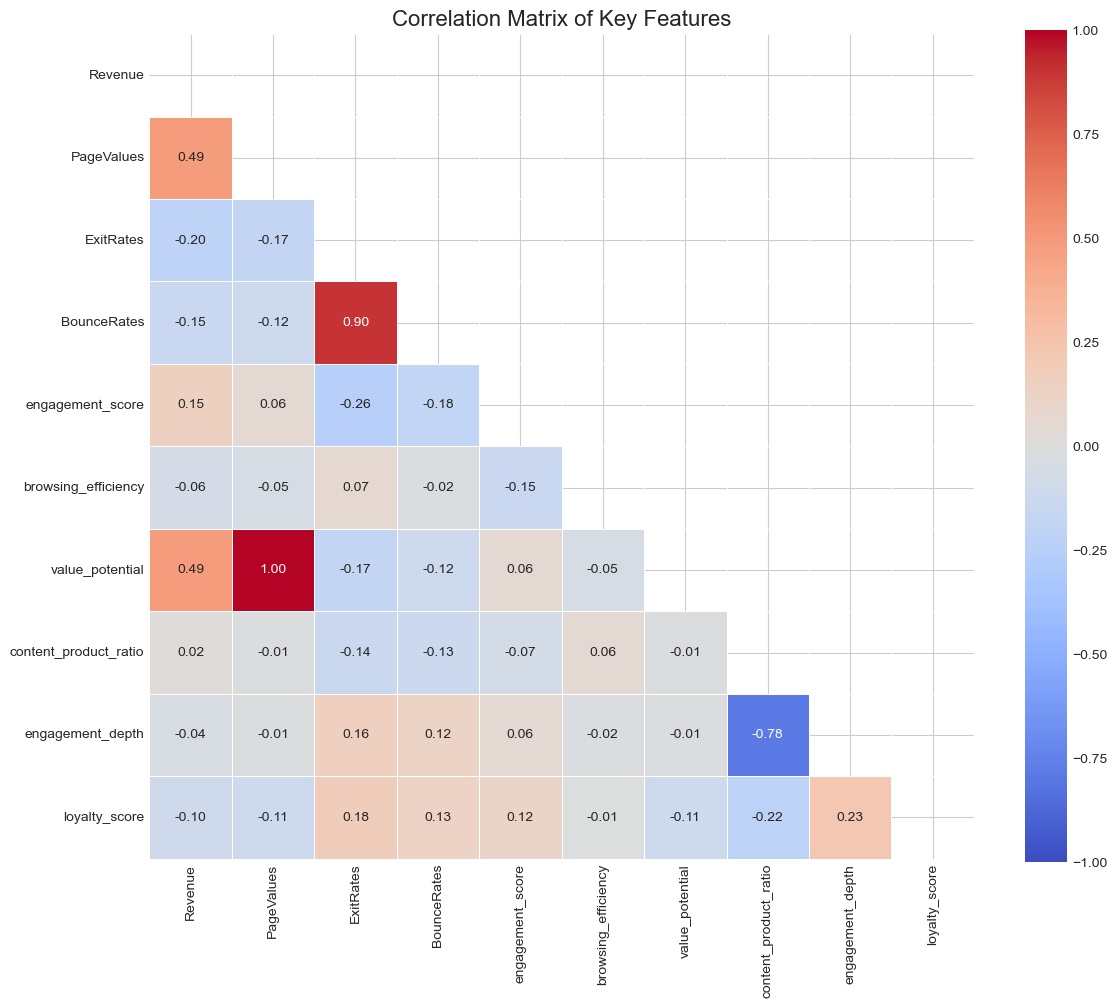

In [12]:
# 5. Correlation Analysis
# Correlation matrix of key features
corr_features = ['Revenue', 'PageValues', 'ExitRates', 'BounceRates', 
                'engagement_score', 'browsing_efficiency', 'value_potential',
                'content_product_ratio', 'engagement_depth', 'loyalty_score']

correlation = shoppers_data[corr_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Matrix of Key Features', fontsize=16)
plt.tight_layout()
plt.show()

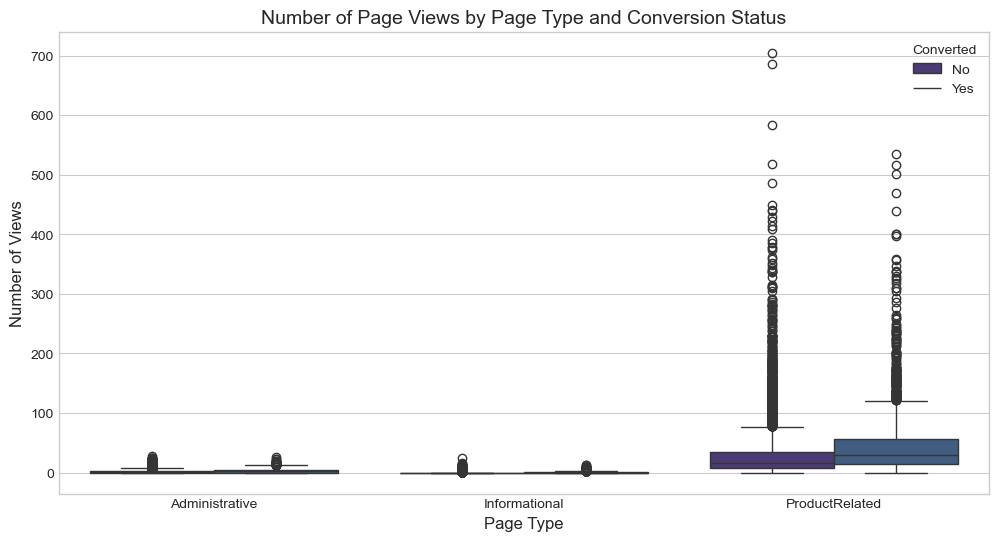

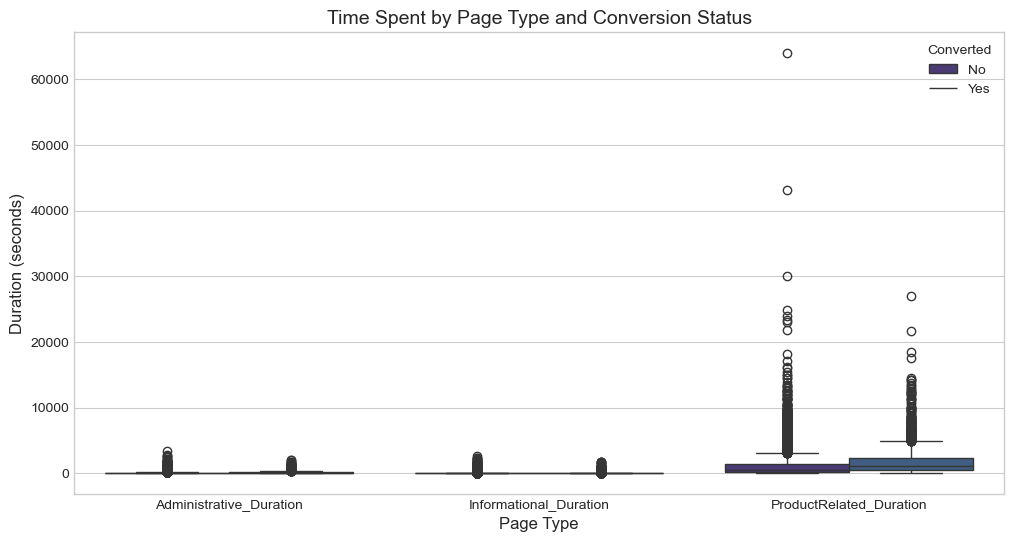

In [13]:
# 6. Page Type Analysis
# Comparison of page views by conversion
page_types = ['Administrative', 'Informational', 'ProductRelated']
page_data = pd.melt(shoppers_data, id_vars=['Revenue'], value_vars=page_types,
                  var_name='Page Type', value_name='Number of Views')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Page Type', y='Number of Views', hue='Revenue', data=page_data)
plt.title('Number of Page Views by Page Type and Conversion Status', fontsize=14)
plt.xlabel('Page Type', fontsize=12)
plt.ylabel('Number of Views', fontsize=12)
plt.legend(title='Converted', labels=['No', 'Yes'])
plt.show()

# Comparison of time spent by page type
time_types = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
time_data = pd.melt(shoppers_data, id_vars=['Revenue'], value_vars=time_types,
                  var_name='Page Type', value_name='Duration (seconds)')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Page Type', y='Duration (seconds)', hue='Revenue', data=time_data)
plt.title('Time Spent by Page Type and Conversion Status', fontsize=14)
plt.xlabel('Page Type', fontsize=12)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.legend(title='Converted', labels=['No', 'Yes'])
plt.show() 

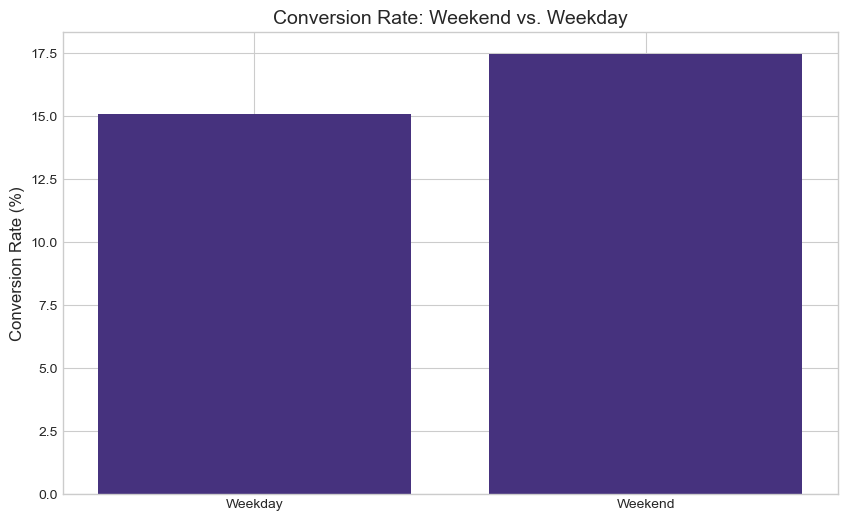

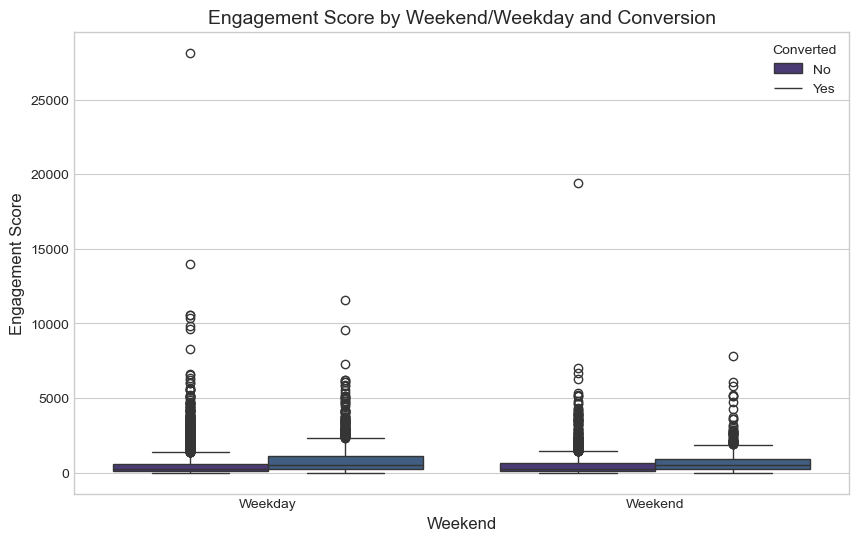

In [14]:
# 7. Weekend vs. Weekday Analysis
# Conversion rate by Weekend/Weekday
plt.figure(figsize=(10, 6))
weekend_conversion = shoppers_data.groupby('Weekend')['Revenue'].mean() * 100
labels = ['Weekday', 'Weekend']
plt.bar(labels, weekend_conversion.values)
plt.title('Conversion Rate: Weekend vs. Weekday', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.show()

# Engagement score by Weekend/Weekday and conversion
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekend', y='engagement_score', hue='Revenue', data=shoppers_data)
plt.title('Engagement Score by Weekend/Weekday and Conversion', fontsize=14)
plt.xlabel('Weekend', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.legend(title='Converted', labels=['No', 'Yes'])
plt.show()

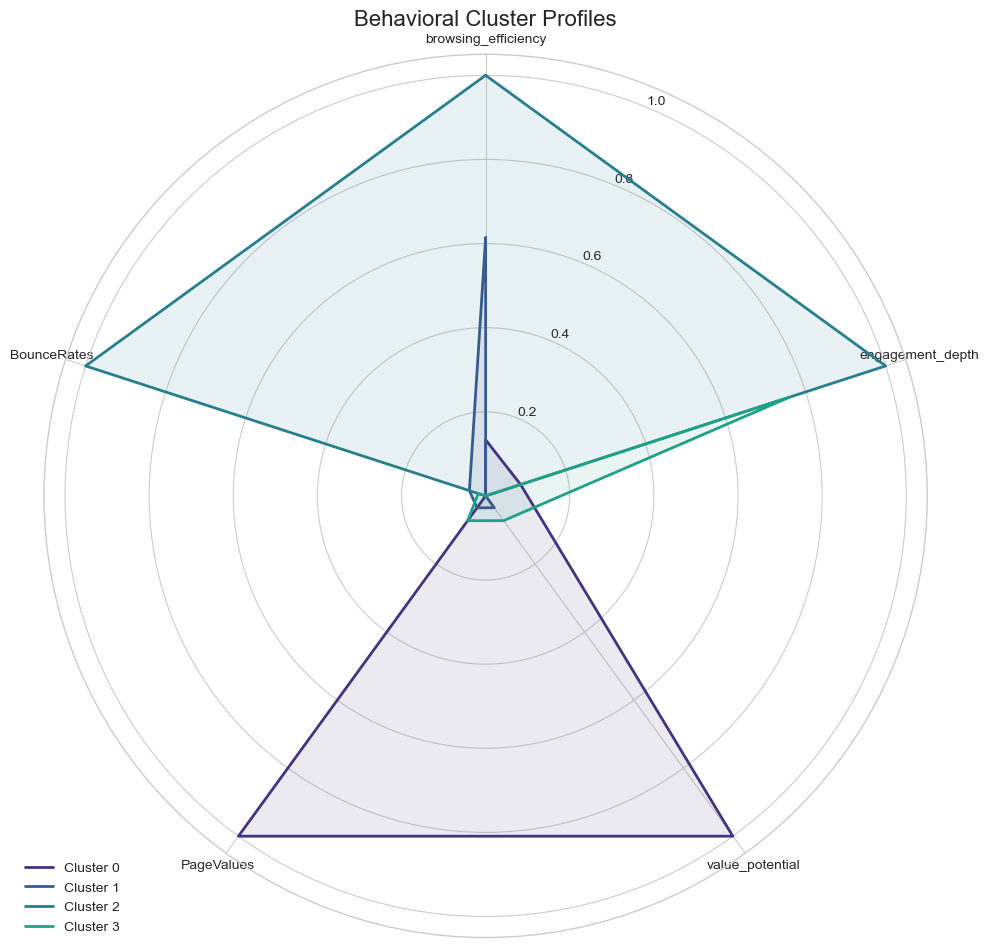

In [18]:
# 8. Behavioral Cluster Analysis
# Create a radar chart for cluster profiles
# First, get the mean values for each cluster
cluster_profiles = shoppers_data.groupby('behavior_cluster')[
    ['browsing_efficiency', 'engagement_depth', 'value_potential', 
     'PageValues', 'BounceRates']].mean()

# Normalize the values for radar chart
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_profiles = pd.DataFrame(
    scaler.fit_transform(cluster_profiles),
    columns=cluster_profiles.columns,
    index=cluster_profiles.index
)

# Plot the radar chart
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_chart(df, labels=None):
    # Number of variables
    categories = list(df.columns)
    N = len(categories)
    
    # What will be the angle of each axis in the plot
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories)
    
    # Draw the cluster profiles
    for i, cluster in enumerate(df.index):
        values = df.loc[cluster].values.flatten().tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    return fig, ax

# Create the radar chart
fig, ax = radar_chart(scaled_profiles)
plt.title('Behavioral Cluster Profiles', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
# 9. Summary statistics for key findings
# Top correlated features with conversion
print("\nTop Features Correlated with Conversion:")
revenue_corr = correlation['Revenue'].sort_values(ascending=False)
print(revenue_corr)

# Conversion rates by segment
print("\nConversion Rates by Behavior Segment:")
print(segment_conversion['conversion_rate'])

# Conversion rates by interest category
print("\nConversion Rates by Interest Category:")
print(interest_conversion['conversion_rate'])

# Mean engagement metrics by conversion status
print("\nEngagement Metrics by Conversion Status:")
print(shoppers_data.groupby('Revenue')[
    ['engagement_score', 'browsing_efficiency', 'value_potential', 'total_duration']
].mean())


Top Features Correlated with Conversion:
Revenue                  1.000000
value_potential          0.491929
PageValues               0.491894
engagement_score         0.154379
content_product_ratio    0.019444
engagement_depth        -0.041672
browsing_efficiency     -0.063441
loyalty_score           -0.103469
BounceRates             -0.145091
ExitRates               -0.204320
Name: Revenue, dtype: float64

Conversion Rates by Behavior Segment:
behavior_segment
High_Converters     78.059072
Product_Browsers    31.205674
Cluster_1           11.123665
Quick_Bouncers       0.657895
Name: conversion_rate, dtype: float64

Conversion Rates by Interest Category:
interest_category
Balanced_Shopper     16.805721
Product_Focused      15.527460
Service_Oriented     14.058355
Research_Oriented     3.846154
Name: conversion_rate, dtype: float64

Engagement Metrics by Conversion Status:
         engagement_score  browsing_efficiency  value_potential  \
Revenue                                      